##НИР ТМО Саргсян Александр ИУ5-63Б

# Описание набора данных

В качестве набора данных используется набор данных компании, занимающейся электронной коммерцией - [E-Commerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics).

Датасет состоит из одного файла Train.csv

В наборе данных присутствуют следующие столбцы:
* ID: Номер клиента.
* Warehouse block: Компания располагает большим складом, разделённом на такие блоки, как A,B,C,D,E.
* Mode of shipment: Компания отгружает продукты разными способами, такими как Ship, Flight and Road.
* Customer care calls: Количество звонков, сделанных с целью получить информацию о грузе.
* Customer rating: Рейтинг компании по мнению клиента.
* Cost of the product: Стоимость продуктов в долларах США.
* Prior purchases: Количество предыдущих покупок.
* Product importance: Важность продукта.
* Gender: Мужчина или Женщина.
* Discount offered: Скидка, предлагаемая на этот конкретный товар.
* Weight in gms: Вес в граммах.
* Reached on time: Целевая переменная, где 1 означает, что продукт НЕ был доставлен вовремя, а 0 - что был доставлен вовремя.

Данный датасет использован для решения задачи классификации - предсказания придет ли товар в срок.

# Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')


In [ ]:
dataset = pd.read_csv('./Train.csv')

# Разведочный анализ данных, визуализация и предобработка данных

## Общая информация о датасете

In [ ]:
dataset.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Not_Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [ ]:
dataset.drop(['ID'], axis=1, inplace=True)

In [ ]:
dataset['Gender']=dataset['Gender'].apply(lambda x: 'Male' if x=='M' else 'Female')

In [ ]:
dataset.shape

(10999, 11)

In [ ]:
dataset.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Not_Reached_on_Time
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Not_Reached_on_Time  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


## Проверка на наличие пропусков

In [ ]:
(dataset.isna().sum() / len(dataset)).round(4) * 100

Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Not_Reached_on_Time    0.0
dtype: float64

## Проверка на дубликаты

In [ ]:
dataset.duplicated().sum()

0

Дубликатов нет

# Меняем типы на категориальные

In [ ]:
dataset['Warehouse_block'] = dataset['Warehouse_block'].astype('category')
dataset['Mode_of_Shipment'] = dataset['Mode_of_Shipment'].astype('category')
dataset['Product_importance'] = dataset['Product_importance'].astype('category')
dataset['Gender'] = dataset['Gender'].astype('category')


## Визуализация

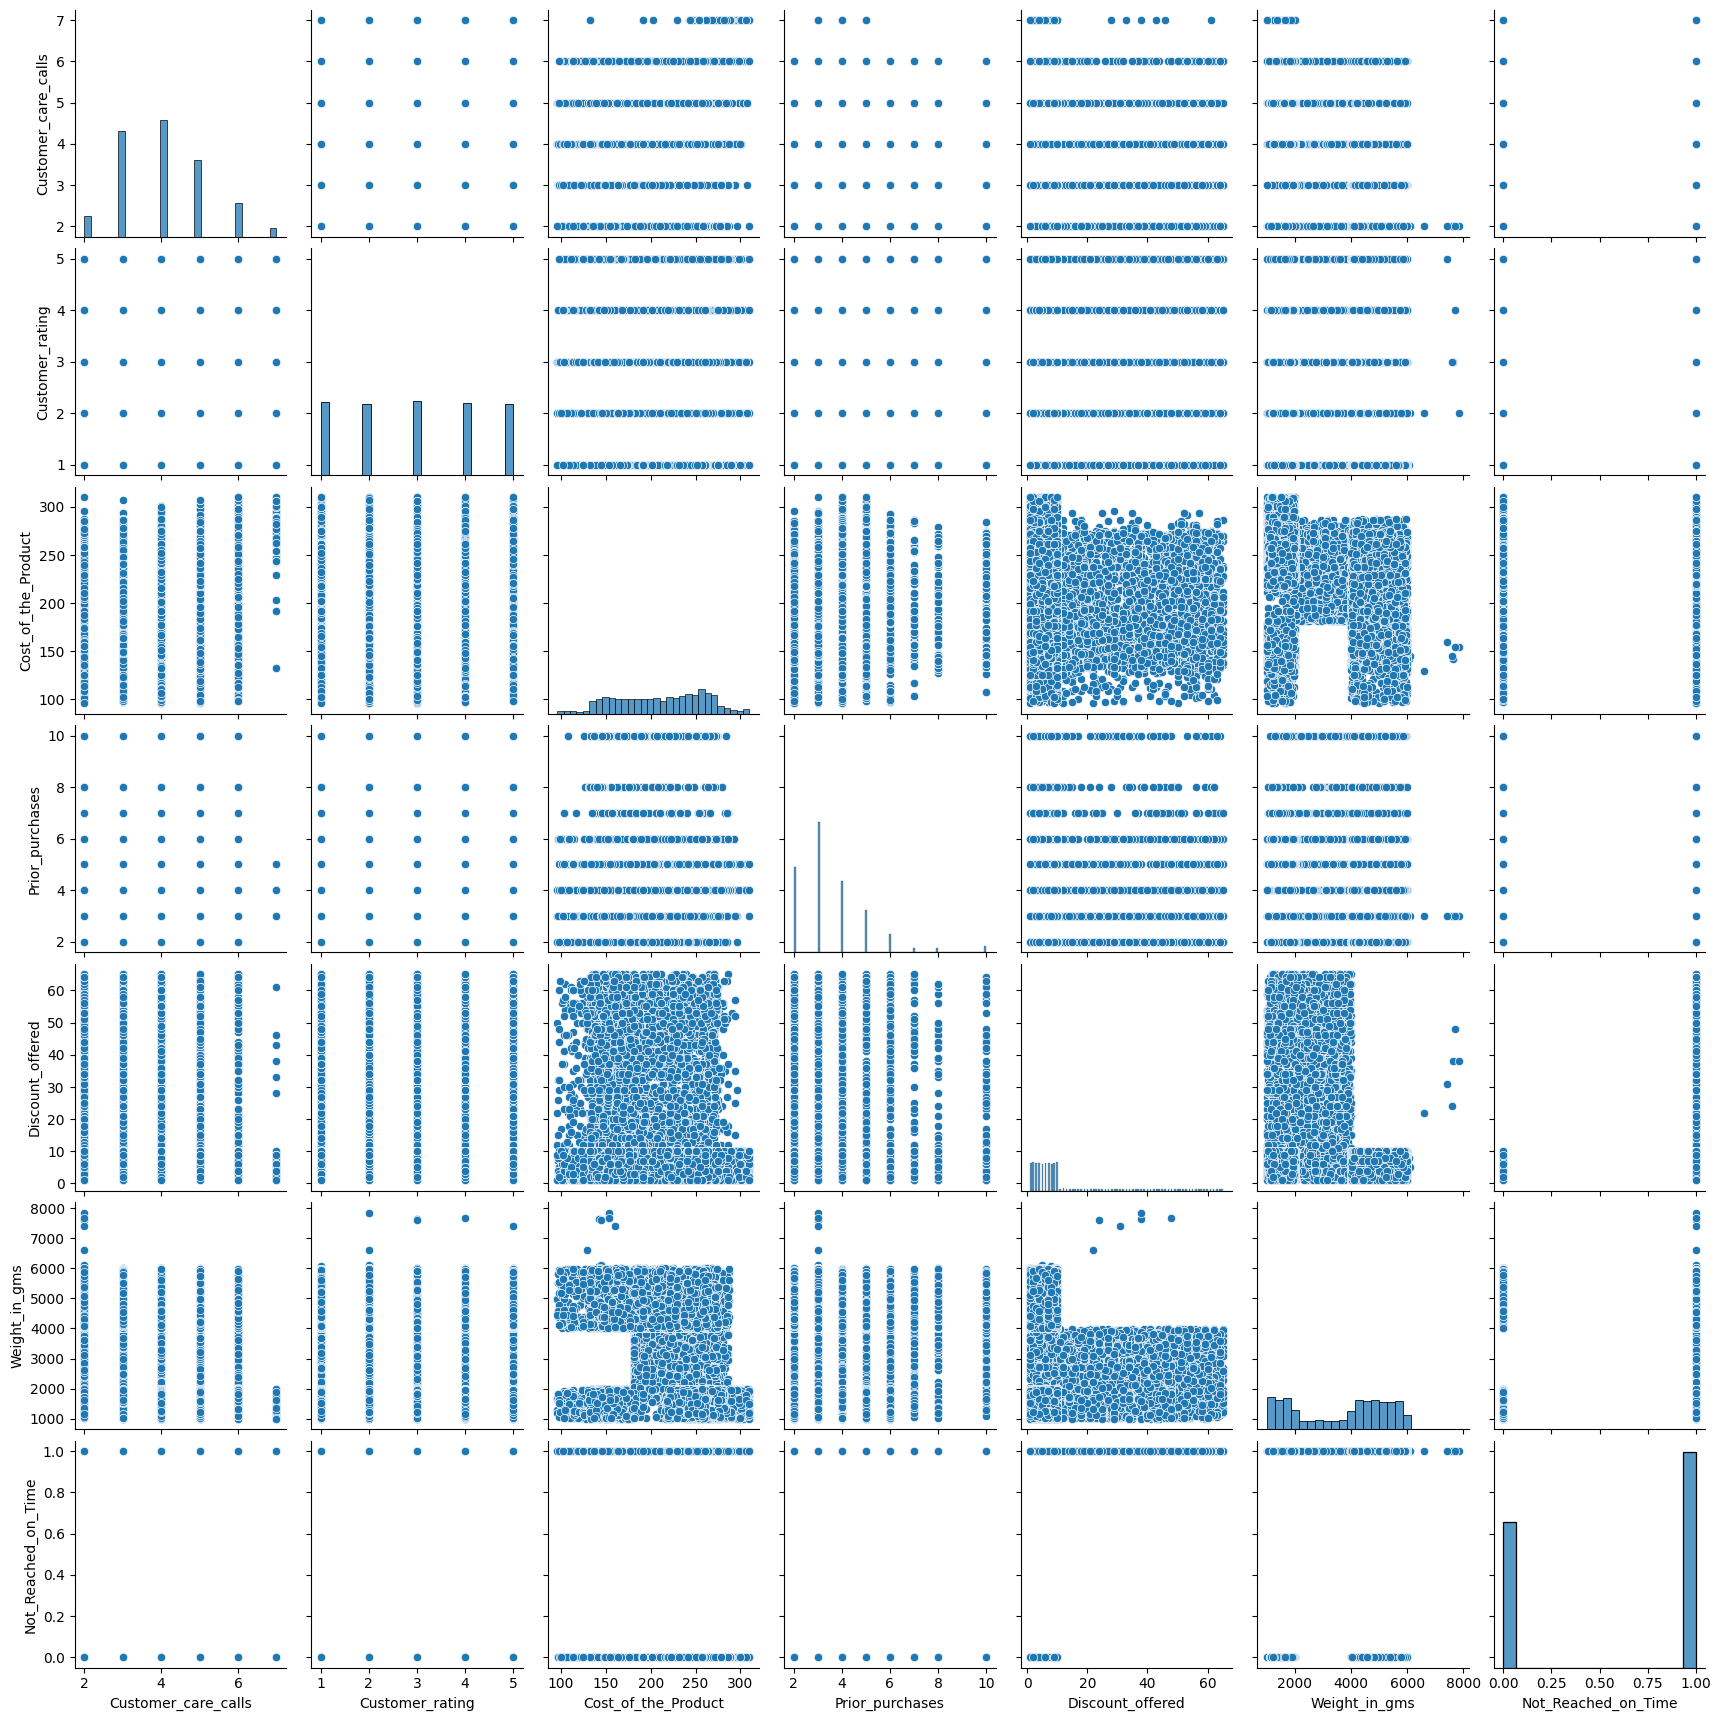

In [ ]:
sns.pairplot(dataset)

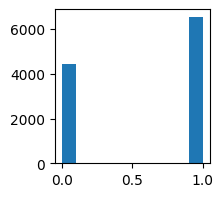

In [ ]:
fig, ax = plt.subplots(figsize=(2,2))
plt.hist(dataset['Not_Reached_on_Time'])
plt.show()

Классы в датасете сбалансированы.



Предположения на основании поиска среднего значения с группировкой по целевому признаку:
* у недоставленных вовремя товаров скидка сильно больше
* у недоставленных вовремя товаров вес значительно ниже
* у недоставленных вовремя товаров цена немного ниже

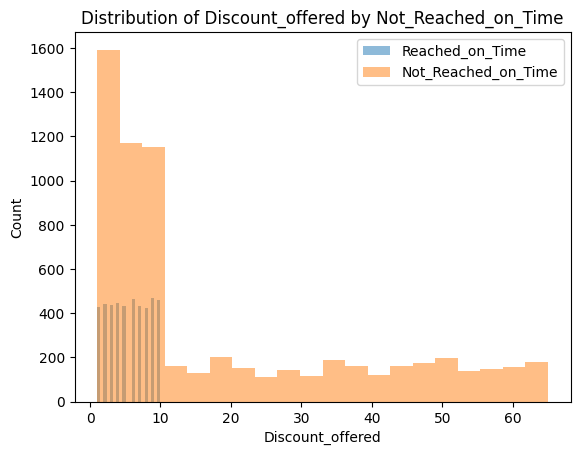

In [ ]:
Not_Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 1]['Discount_offered']
Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 0]['Discount_offered']

plt.hist(Reached_on_Time, bins=20, alpha=0.5, label='Reached_on_Time')
plt.hist(Not_Reached_on_Time, bins=20, alpha=0.5, label='Not_Reached_on_Time')

plt.xlabel('Discount_offered')
plt.ylabel('Count')
plt.title('Distribution of Discount_offered by Not_Reached_on_Time')

plt.legend()

plt.show()

Можно заметить, что при скидке до 10% доставленных вовремя товаров в 2-3 раза меньше, а при скидке более 10% доставленных вовремя товаров вообще нет

In [ ]:
from scipy.stats import ttest_ind

Not_Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 1]['Discount_offered']
Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 0]['Discount_offered']

t_statistic, p_value = ttest_ind(Not_Reached_on_Time, Reached_on_Time)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 45.3744750332705
p-value: 0.0


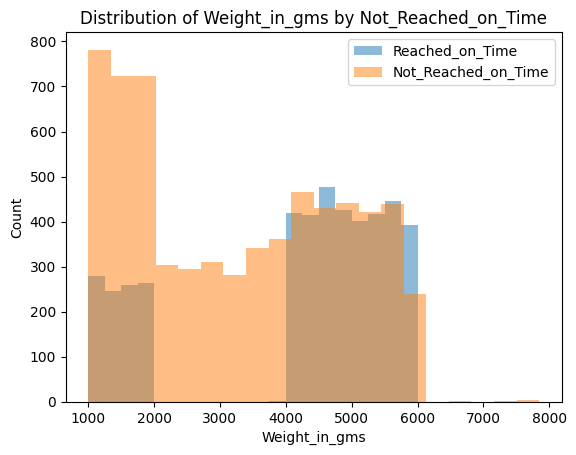

In [ ]:
Not_Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 1]['Weight_in_gms']
Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 0]['Weight_in_gms']

plt.hist(Reached_on_Time, bins=20, alpha=0.5, label='Reached_on_Time')
plt.hist(Not_Reached_on_Time, bins=20, alpha=0.5, label='Not_Reached_on_Time')

plt.xlabel('Weight_in_gms')
plt.ylabel('Count')
plt.title('Distribution of Weight_in_gms by Not_Reached_on_Time')

plt.legend()

plt.show()

Видно, что чем меньше вес товара, тем больше шанс того, что товар приедет не вовремя

In [ ]:
from scipy.stats import ttest_ind

Not_Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 1]['Weight_in_gms']
Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 0]['Weight_in_gms']

t_statistic, p_value = ttest_ind(Not_Reached_on_Time, Reached_on_Time)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -29.264343461838504
p-value: 2.3546582802914183e-181


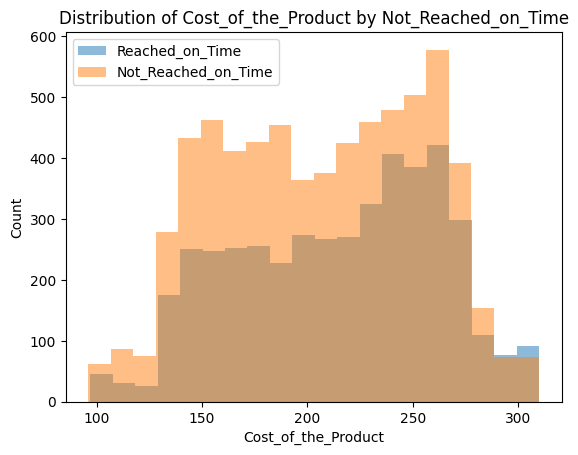

In [ ]:
Not_Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 1]['Cost_of_the_Product']
Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 0]['Cost_of_the_Product']

plt.hist(Reached_on_Time, bins=20, alpha=0.5, label='Reached_on_Time')
plt.hist(Not_Reached_on_Time, bins=20, alpha=0.5, label='Not_Reached_on_Time')

plt.xlabel('Cost_of_the_Product')
plt.ylabel('Count')
plt.title('Distribution of Cost_of_the_Product by Not_Reached_on_Time')

plt.legend()

plt.show()

В среднем, стоимость не доставленного вовремя товара выше

In [ ]:
from scipy.stats import ttest_ind

Not_Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 1]['Cost_of_the_Product']
Reached_on_Time = dataset[dataset['Not_Reached_on_Time'] == 0]['Cost_of_the_Product']

t_statistic, p_value = ttest_ind(Not_Reached_on_Time, Reached_on_Time)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -7.737818128158982
p-value: 1.099885972621861e-14


# Кодирование категориальных признаков, масштабирование данных.

In [ ]:
dataset.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Not_Reached_on_Time
0,D,Flight,4,2,177,3,low,Female,44,1233,1
1,F,Flight,4,5,216,2,low,Male,59,3088,1
2,A,Flight,2,2,183,4,low,Male,48,3374,1
3,B,Flight,3,3,176,4,medium,Male,10,1177,1
4,C,Flight,2,2,184,3,medium,Female,46,2484,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Warehouse_block      10999 non-null  category
 1   Mode_of_Shipment     10999 non-null  category
 2   Customer_care_calls  10999 non-null  int64   
 3   Customer_rating      10999 non-null  int64   
 4   Cost_of_the_Product  10999 non-null  int64   
 5   Prior_purchases      10999 non-null  int64   
 6   Product_importance   10999 non-null  category
 7   Gender               10999 non-null  category
 8   Discount_offered     10999 non-null  int64   
 9   Weight_in_gms        10999 non-null  int64   
 10  Not_Reached_on_Time  10999 non-null  int64   
dtypes: category(4), int64(7)
memory usage: 645.2 KB


## Масштабирование

Посмотрим на распредление колонок, которые будем масштабировать

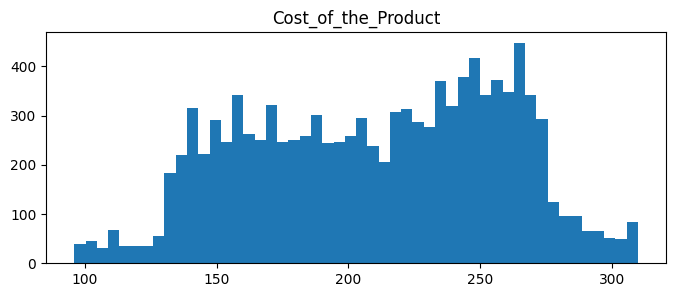

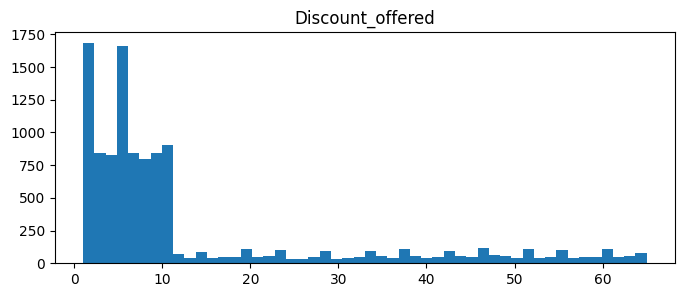

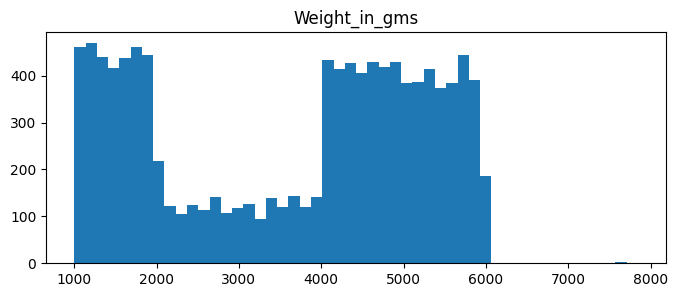

In [ ]:
for col in ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']:
    fig, ax = plt.subplots(figsize=(8,3))
    ax.hist(dataset[col], 50)
    ax.title.set_text(col)
    plt.show()

Масштабируем с помощью StandardScaler, который преобразует каждый признак таким образом, чтобы он имел среднее значение равное 0 и стандартное отклонение равное 1.

In [ ]:
scaler = StandardScaler()

dataset[['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']] = scaler.fit_transform(dataset[['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']])


In [ ]:
dataset[['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']].describe()

,Cost_of_the_Product,Discount_offered,Weight_in_gms
count,1.099900e+04,1.099900e+04,1.099900e+04
mean,-1.343694e-16,-4.134443e-17,-1.188652e-16
std,1.000045e+00,1.000045e+00,1.000045e+00
min,-2.376077e+00,-7.635530e-01,-1.610109e+00
25%,-8.571765e-01,-5.784225e-01,-1.097360e+00
50%,7.913188e-02,-3.932921e-01,3.149161e-01
75%,8.489855e-01,-2.081616e-01,8.658844e-01
max,2.076590e+00,3.185896e+00,2.575659e+00


Убедимся что распределение не изменилось

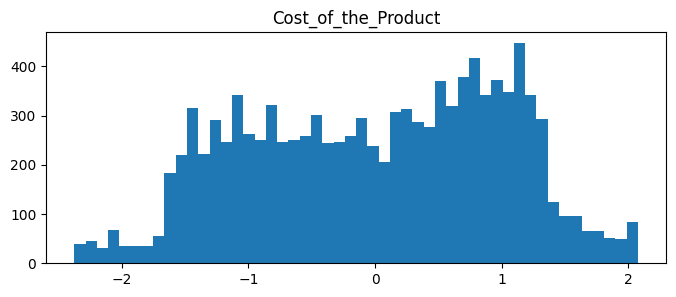

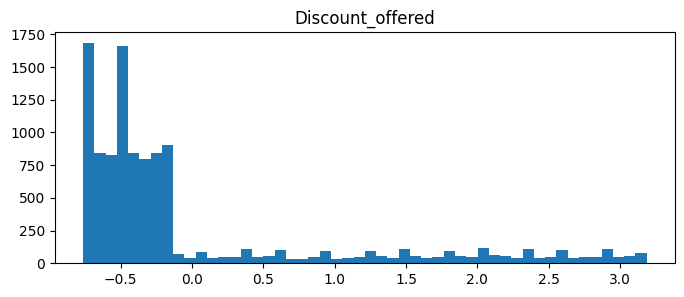

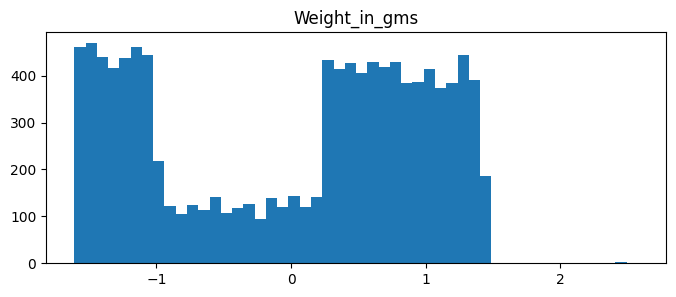

In [ ]:
for col in ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']:
    fig, ax = plt.subplots(figsize=(8,3))
    ax.hist(dataset[col], 50)
    ax.title.set_text(col)
    plt.show()

## Кодирование категориальных признаков

In [ ]:
category_columns = dataset.select_dtypes(include=['category']).columns
category_columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

In [ ]:
ohe = OneHotEncoder()
encoded_columns = ohe.fit_transform(dataset[category_columns])


In [ ]:
dataset[np.concatenate(ohe.categories_)] = encoded_columns.toarray()
dataset.drop(['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'], axis=1, inplace=True)
dataset

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Not_Reached_on_Time,A,B,C,D,F,Flight,Road,Ship,high,low,medium,Female,Male
0,4,2,-0.690722,3,1.889983,-1.468240,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,4,5,0.120746,2,2.815636,-0.333893,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,2,-0.565881,4,2.136824,-0.159002,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,3,3,-0.711529,4,-0.208162,-1.502484,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2,2,-0.545074,3,2.013404,-0.703244,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,0.869792,5,-0.763553,-1.281730,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
10995,4,1,0.453655,5,-0.455002,-1.459679,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
10996,5,4,0.661724,5,-0.578423,-1.515937,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
10997,5,2,0.266394,6,-0.701843,-1.482304,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
dataset = dataset[[x for x in dataset.columns if x != 'Not_Reached_on_Time']+['Not_Reached_on_Time']]

In [ ]:
dataset.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,A,B,C,D,F,Flight,Road,Ship,high,low,medium,Female,Male,Not_Reached_on_Time
0,4,2,-0.690722,3,1.889983,-1.468240,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,4,5,0.120746,2,2.815636,-0.333893,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,2,2,-0.565881,4,2.136824,-0.159002,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,3,3,-0.711529,4,-0.208162,-1.502484,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2,2,-0.545074,3,2.013404,-0.703244,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


# Формирование промежуточных выводов о возможности построения моделей машинного обучения.

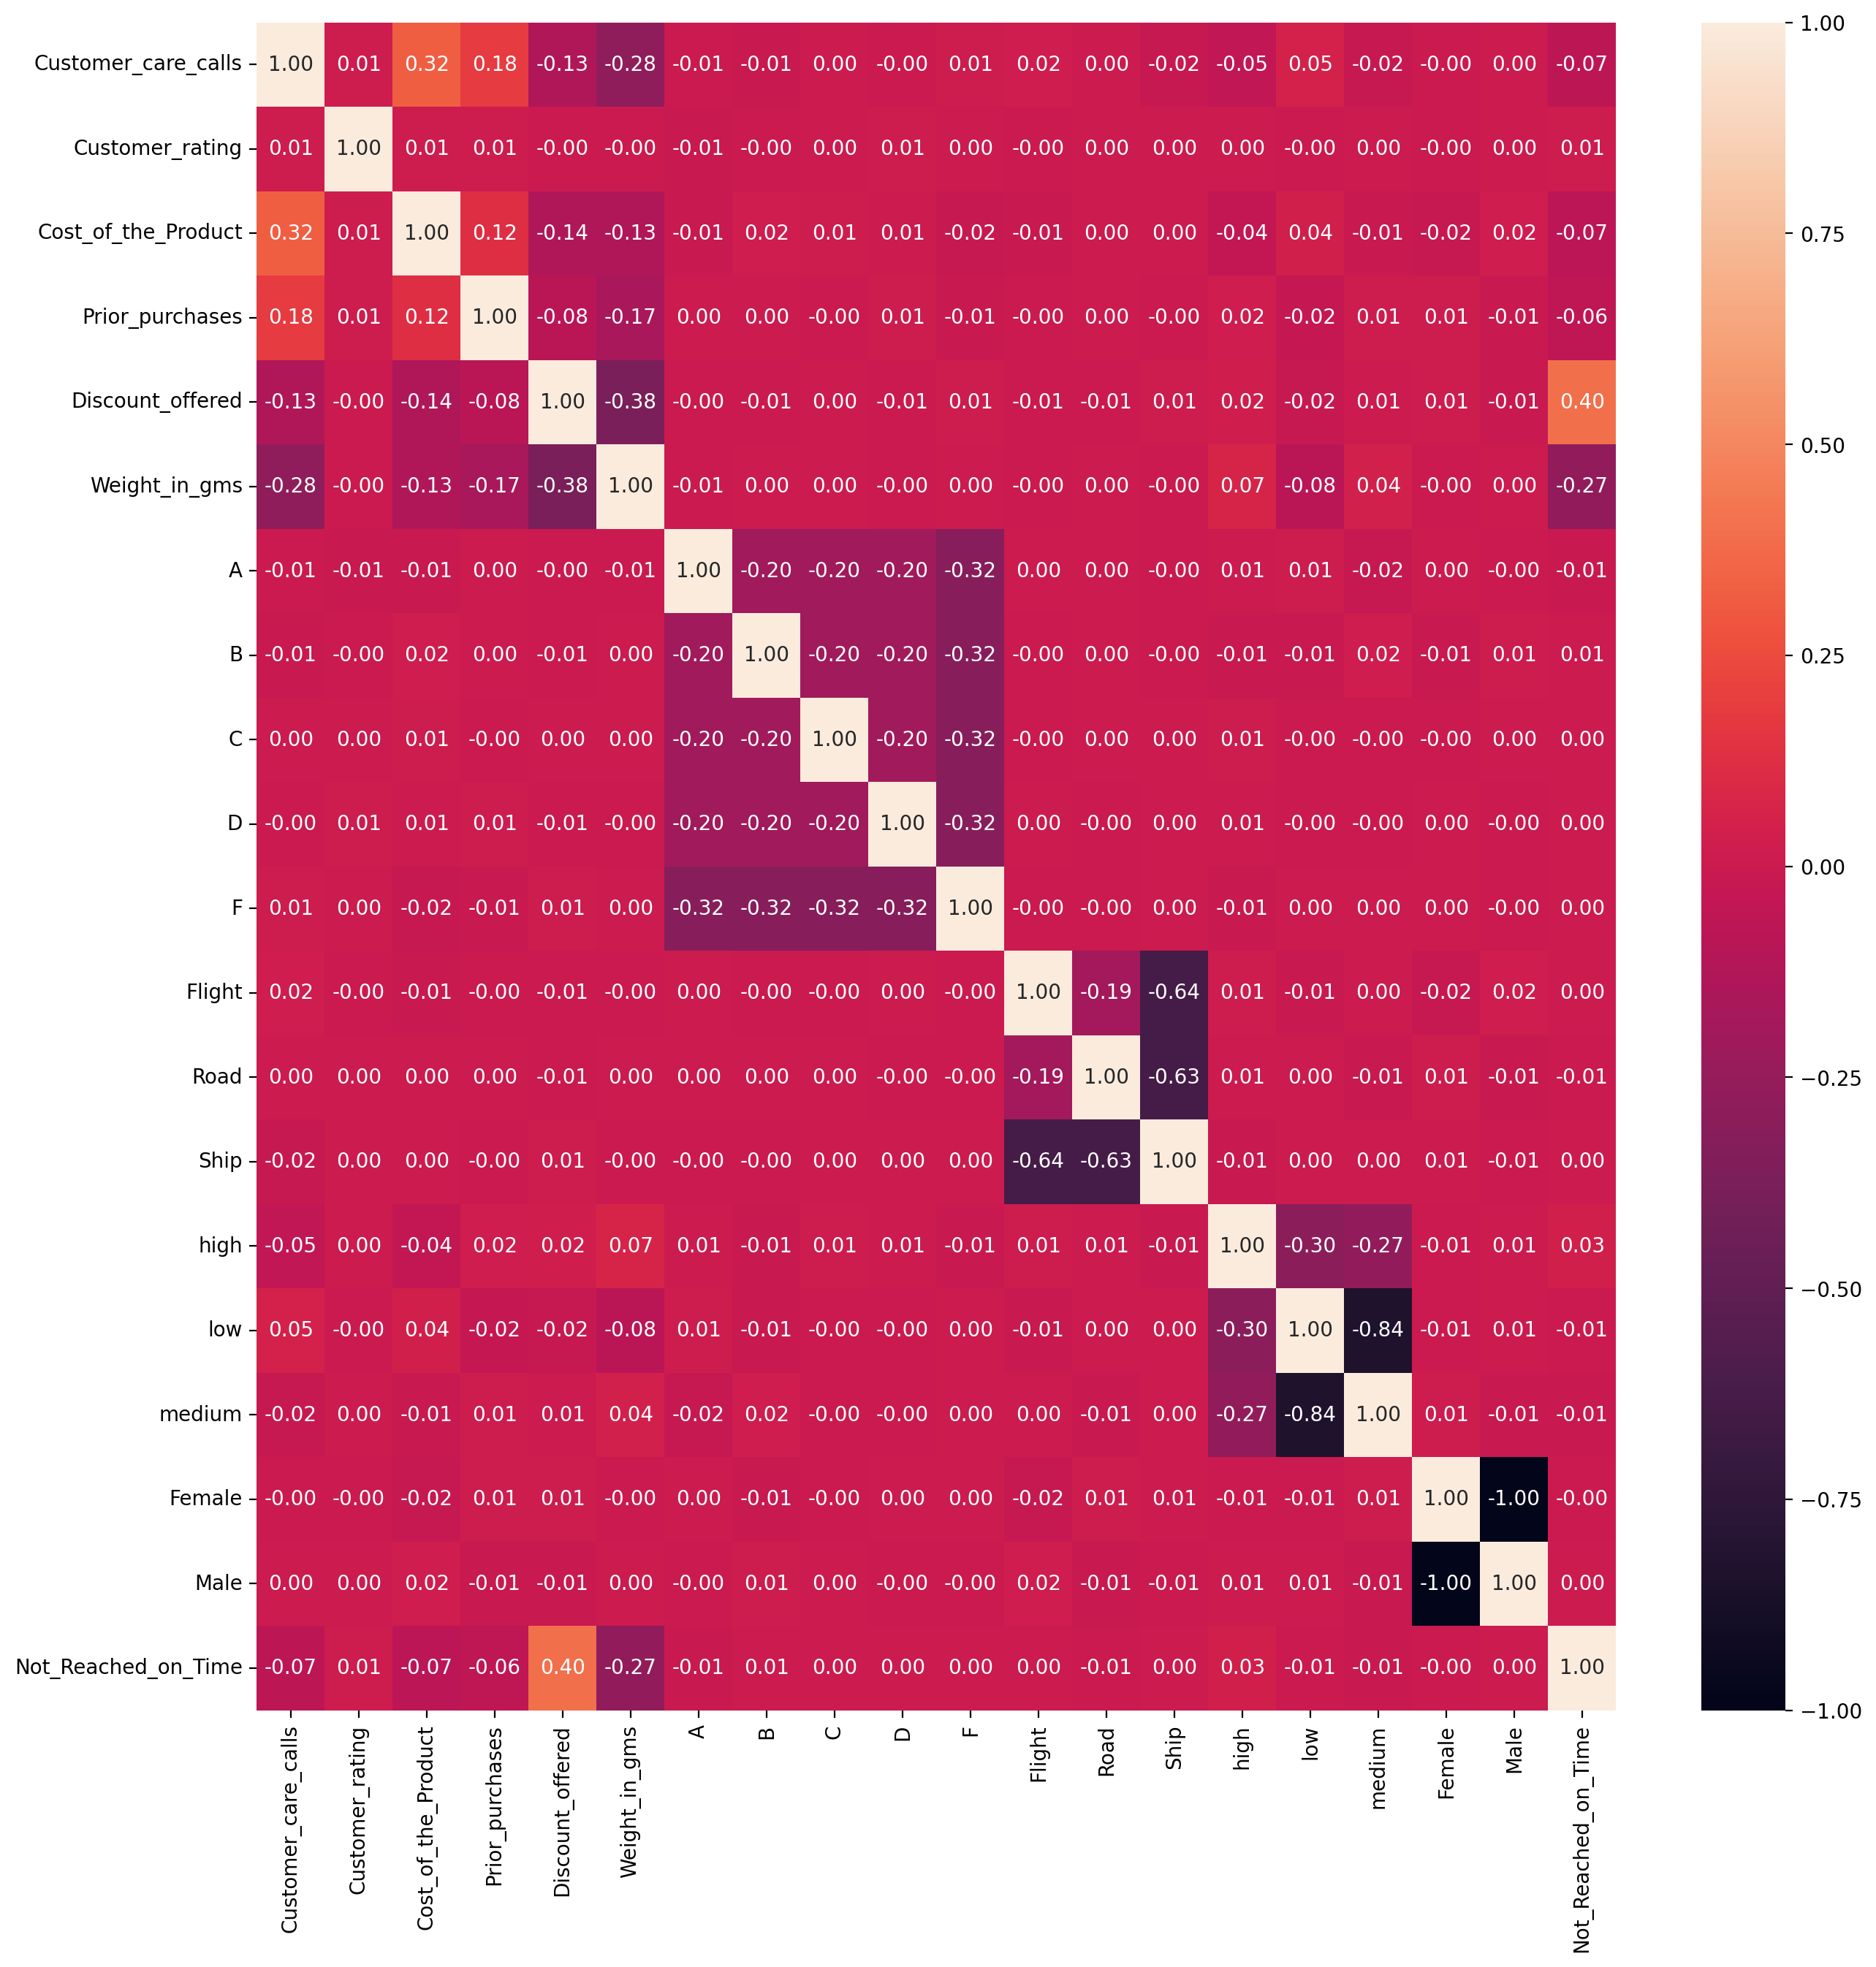

In [ ]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 15), dpi=200)
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

In [ ]:
dataset = dataset[['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','high','Not_Reached_on_Time']]

In [ ]:
dataset.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,high,Not_Reached_on_Time
0,4,-0.690722,3,1.889983,-1.468240,0.0,1
1,4,0.120746,2,2.815636,-0.333893,0.0,1
2,2,-0.565881,4,2.136824,-0.159002,0.0,1
3,3,-0.711529,4,-0.208162,-1.502484,0.0,1
4,2,-0.545074,3,2.013404,-0.703244,0.0,1


# Выбор метрик для последующей оценки качества моделей

Выбираем метрики которые учитывают TP:
* $Precision = \frac{TP}{TP + FP}$ - показывает, какую долю объектов, которые модель предсказала как положительные, действительно являются положительными.
* $Recall  \frac{TP}{TP + FN}$ - показывает, какую долю положительных объектов модель способна обнаружить.
* $F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$ - среднее гармоническое precision и recall
* $ROC AUC$

# Выбор моделей для решения задачи классификации

Используем следующие модели
* KNN
* SVC
* Дерево решений
* Случайный лес
* Градиентный бустинг

# Формирование обучающей и тестовой выборок на основе исходного набора данных


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.

In [ ]:
from sklearn.metrics import roc_auc_score

def evaluate_models(X_train, X_test, y_train, y_test, models):

    metrics = ['Precision', 'Recall', 'F1-score']

    for model in models:
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f'{model.__class__.__name__}:')
        for i, metric in enumerate(metrics):
            print(f'{metric}: {round([precision, recall, f1][i], 2)}')


        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)

        print("ROC AUC score:", roc_auc_score(y_test, y_proba))
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model.__class__.__name__}: ROC curve')
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
models = [KNeighborsClassifier(), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]


KNeighborsClassifier:
Precision: 0.74
Recall: 0.68
F1-score: 0.71
ROC AUC score: 0.7403174322992512


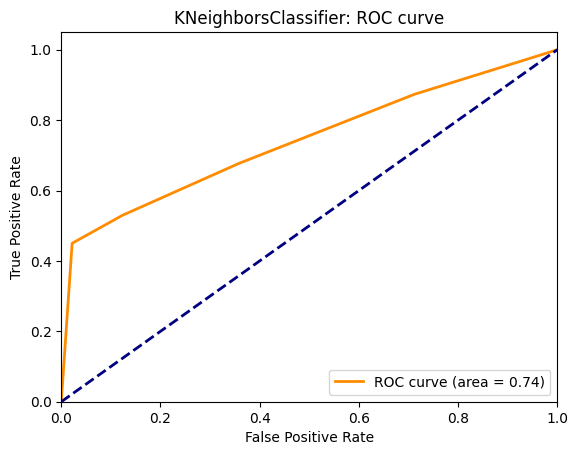

SVC:
Precision: 0.95
Recall: 0.5
F1-score: 0.66
ROC AUC score: 0.7322176564902472


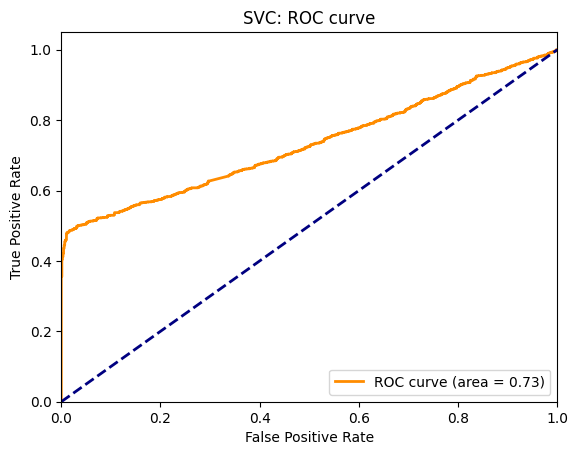

DecisionTreeClassifier:
Precision: 0.72
Recall: 0.7
F1-score: 0.71
ROC AUC score: 0.6367846286831222


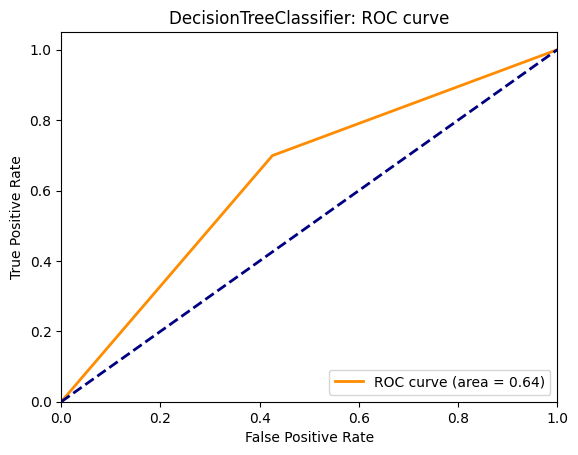

RandomForestClassifier:
Precision: 0.76
Recall: 0.67
F1-score: 0.71
ROC AUC score: 0.746390749936619


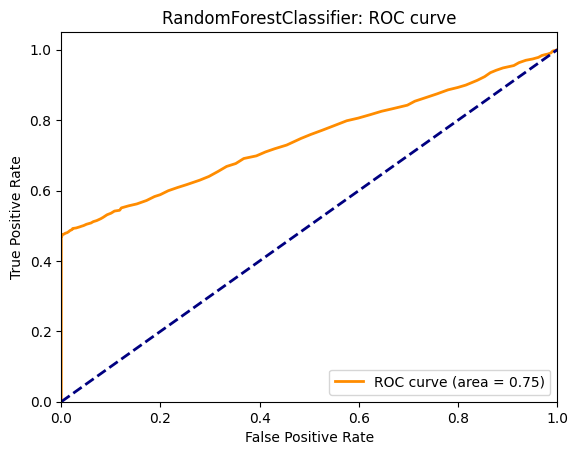

GradientBoostingClassifier:
Precision: 0.91
Recall: 0.54
F1-score: 0.67
ROC AUC score: 0.7442457500188195


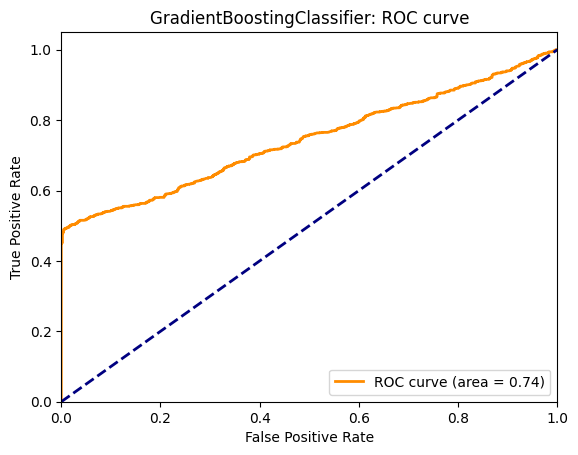

In [ ]:
evaluate_models(X_train, X_test, y_train, y_test, models)

In [ ]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [7,8,9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}
Best score: 0.7874324888576618


In [ ]:
best_knn_model = KNeighborsClassifier(**grid_search.best_params_)
best_knn_model

KNeighborsClassifier(n_neighbors=8)

In [ ]:
svc_model = SVC()
param_grid = {'C': [1],
              'kernel': ['linear', 'rbf'],
              'degree': [4],
              'gamma': ['scale']}

grid_search = GridSearchCV(svc_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.6678031594499374


In [ ]:
best_svc_model = SVC(**grid_search.best_params_, probability=True)
best_svc_model

SVC(C=1, degree=4, probability=True)

In [ ]:
tree_model = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: 0.6799624657605045


In [ ]:
best_tree_model = DecisionTreeClassifier(**grid_search.best_params_)
best_tree_model

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=2, min_samples_split=10)

In [ ]:
rf_model = RandomForestClassifier()
param_grid = {'n_estimators': [100],
              'max_depth': [5, None],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'max_features': ['sqrt', None]}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.6822357744586284


In [ ]:
best_rf_model = RandomForestClassifier(**grid_search.best_params_)
best_rf_model

RandomForestClassifier(max_depth=5, max_features=None, min_samples_split=5)

In [ ]:
gb_model = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.1, 0.2],
              'max_depth': [3, 5],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', None]}

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: 0.6831460282185124


In [ ]:
best_gb_model = GradientBoostingClassifier(**grid_search.best_params_)
best_gb_model


GradientBoostingClassifier(min_samples_leaf=4)

In [ ]:
opt_models = [ best_knn_model, best_svc_model, best_tree_model, best_rf_model, best_gb_model]

KNeighborsClassifier:
Precision: 0.8
Recall: 0.61
F1-score: 0.69
ROC AUC score: 0.7447099664189403


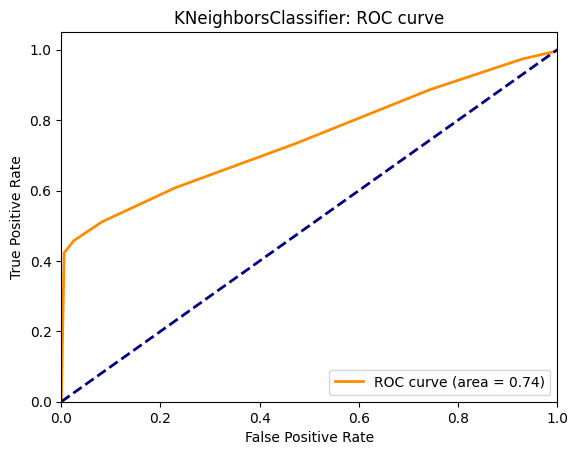

SVC:
Precision: 0.95
Recall: 0.5
F1-score: 0.66
ROC AUC score: 0.7322470756097329


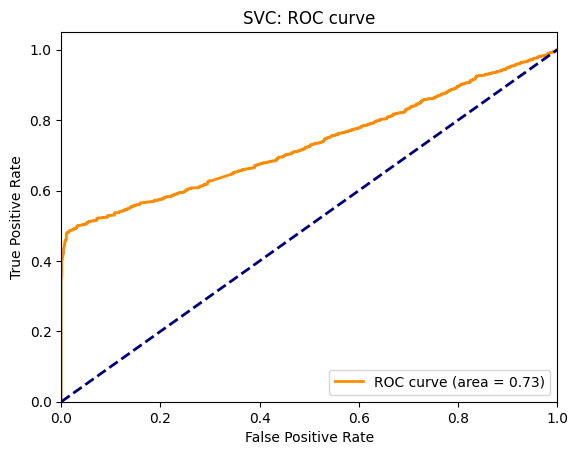

DecisionTreeClassifier:
Precision: 0.95
Recall: 0.5
F1-score: 0.66
ROC AUC score: 0.7412943201198223


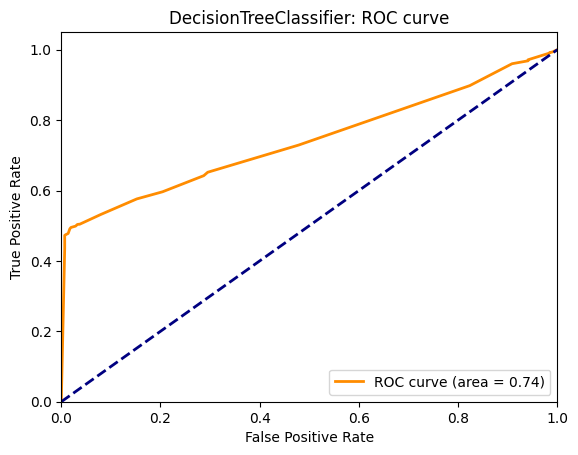

RandomForestClassifier:
Precision: 0.95
Recall: 0.52
F1-score: 0.67
ROC AUC score: 0.7590825041900613


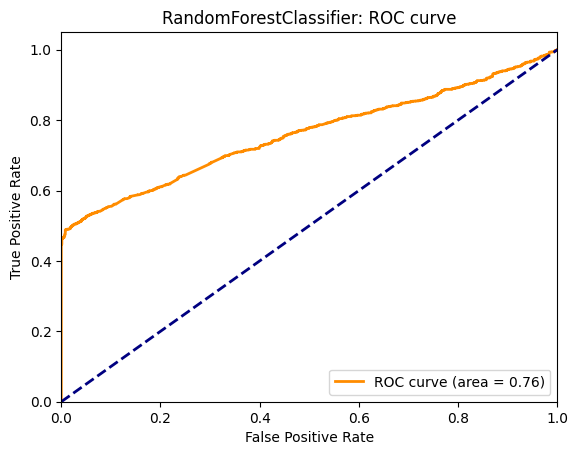

GradientBoostingClassifier:
Precision: 0.91
Recall: 0.53
F1-score: 0.67
ROC AUC score: 0.7467165234215128


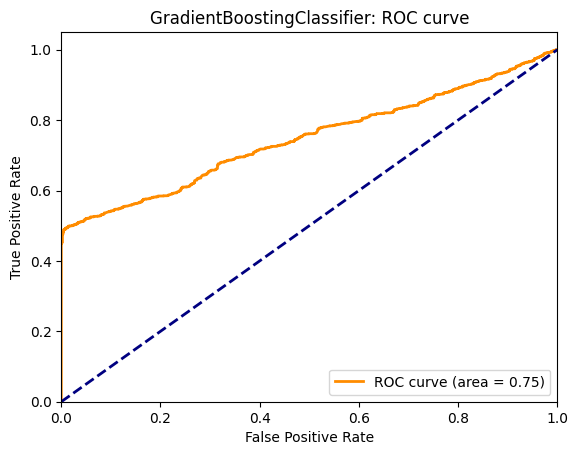

In [ ]:
evaluate_models(X_train, X_test, y_train, y_test, opt_models)

На основании трех метрик из четырех лучшими для решения данной задачи классификации оказались модели градиентного бустинга и метод случайного леса.